In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:

# Open file picker
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Read Excel file
df = pd.read_excel(file_name)

# Date processing
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Seaborn style (Colab-safe)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 120


Saving 1 SALES DASHBOARD FOR EXCEL CLASS.xlsx to 1 SALES DASHBOARD FOR EXCEL CLASS.xlsx


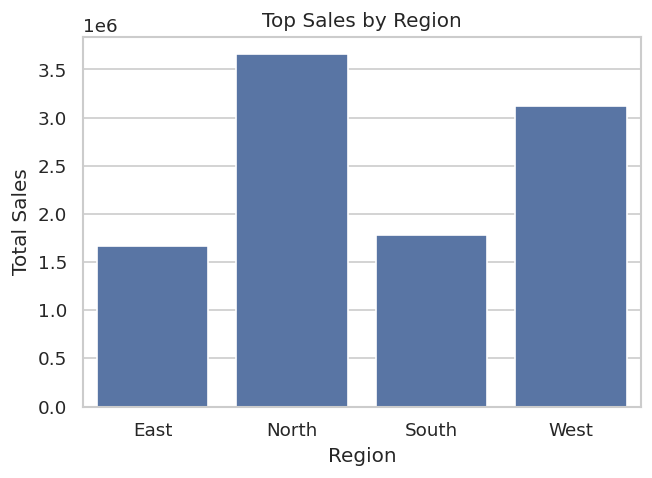

In [ ]:
region_sales = df.groupby('Region', as_index=False)['Total Sales'].sum()

plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='Total Sales', data=region_sales)
plt.title("Top Sales by Region")
plt.show()


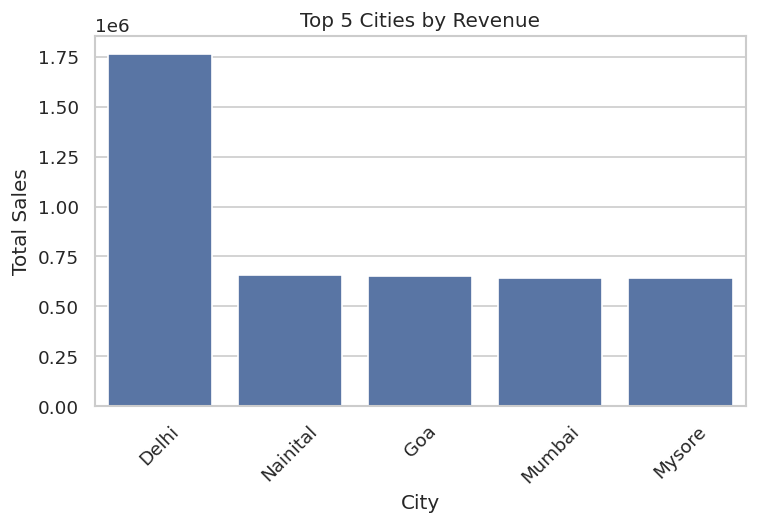

In [ ]:
city_sales = (
    df.groupby('City', as_index=False)['Total Sales']
    .sum()
    .sort_values(by='Total Sales', ascending=False)
    .head(5)
)

plt.figure(figsize=(7,4))
sns.barplot(x='City', y='Total Sales', data=city_sales)
plt.title("Top 5 Cities by Revenue")
plt.xticks(rotation=45)
plt.show()


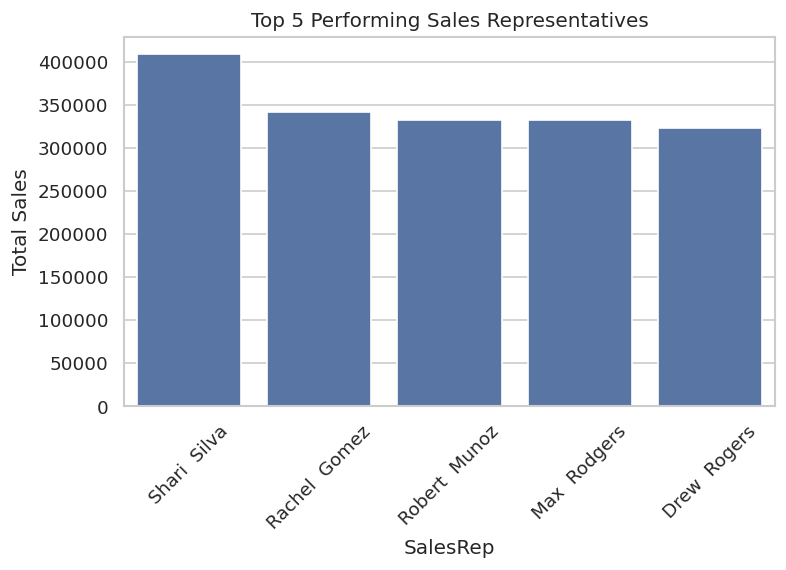

In [ ]:
sales_rep = (
    df.groupby('SalesRep', as_index=False)['Total Sales']
    .sum()
    .sort_values(by='Total Sales', ascending=False)
    .head(5)
)

plt.figure(figsize=(7,4))
sns.barplot(x='SalesRep', y='Total Sales', data=sales_rep)
plt.title("Top 5 Performing Sales Representatives")
plt.xticks(rotation=45)
plt.show()


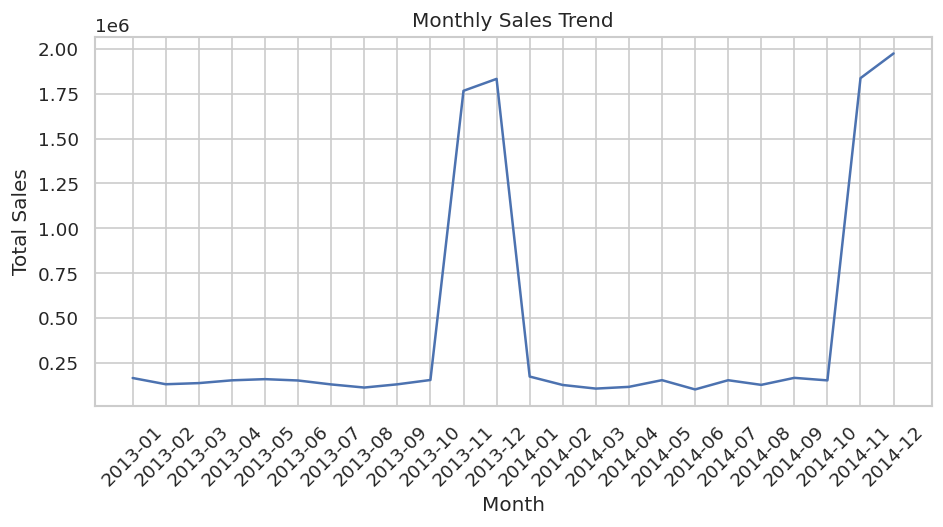

In [ ]:
monthly_sales = df.groupby('Month', as_index=False)['Total Sales'].sum()

plt.figure(figsize=(9,4))
sns.lineplot(x='Month', y='Total Sales', data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


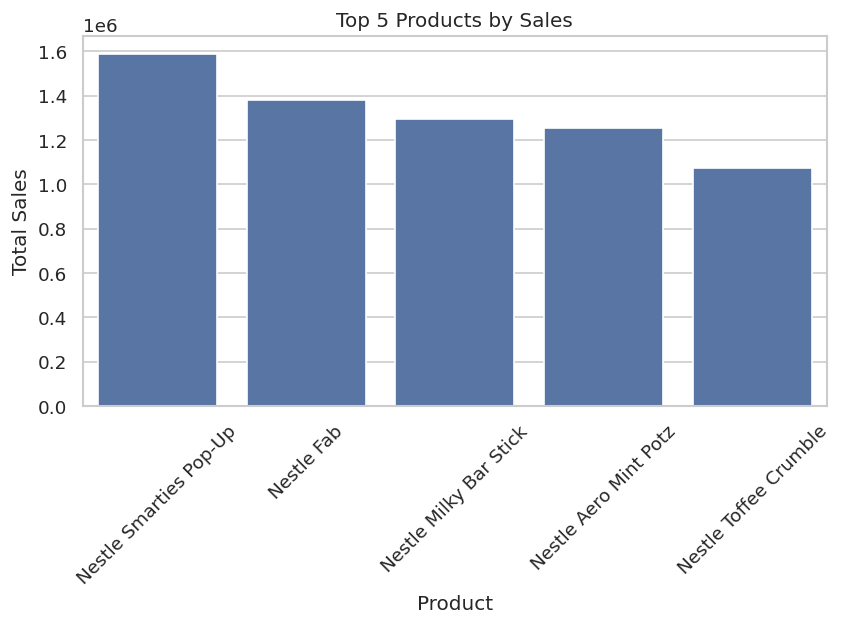

In [ ]:
product_sales = (
    df.groupby('Product', as_index=False)['Total Sales']
    .sum()
    .sort_values(by='Total Sales', ascending=False)
    .head(5)
)

plt.figure(figsize=(8,4))
sns.barplot(x='Product', y='Total Sales', data=product_sales)
plt.title("Top 5 Products by Sales")
plt.xticks(rotation=45)
plt.show()


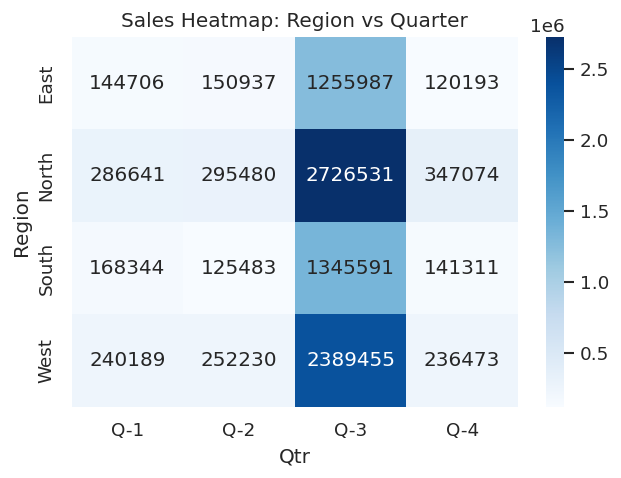

In [ ]:
pivot = pd.pivot_table(
    df,
    values='Total Sales',
    index='Region',
    columns='Qtr',
    aggfunc='sum'
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sales Heatmap: Region vs Quarter")
plt.show()


In [ ]:
print("Total Revenue:", np.sum(df['Total Sales']))
print("Average Order Value:", np.mean(df['Total Sales']))
print("Total Units Sold:", np.sum(df['Units']))


Total Revenue: 10226625
Average Order Value: 1022.6625
Total Units Sold: 33874
